In [115]:
from IPython.display import display, HTML

# Your information
name = "Rahat Hasan Robin"
student_id = "2021-1-60-098"

# Enhanced Styling with HTML and CSS
html_code = f"""
<div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align: center; padding: 30px; border-radius: 15px; background: linear-gradient(135deg, #6e7c7c, #a0b8b8); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); width: 50%; margin: 50px auto; border: 3px solid #fff;">
    <h2 style="color: white; font-size: 32px; margin-bottom: 20px;">Student Information</h2>
    <p style="font-size: 22px; color: #f4f4f4; font-weight: bold; margin: 10px 0;">Name: <span style="color: #f9d342;">{name}</span></p>
    <p style="font-size: 22px; color: #f4f4f4; font-weight: bold; margin: 10px 0;">ID: <span style="color: #f9d342;">{student_id}</span></p>
</div>
"""

# Display the HTML content
display(HTML(html_code))

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Data Preparation

1.1 Load the Data

In [117]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/computer science 101/CSE475/LAB-3/output.csv')

# Display the first few rows
print(df.head())

   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No


1.2 Data Exploration

In [118]:
# Summary statistics
print(df.describe())

           Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std     30.166206    2.816294      1.554275     1.984671    2.512957
min      1.000000   38.796800     25.140300    19.541300    2.800000
25%     26.750000   43.911375     27.871300    24.896425   10.650000
50%     52.500000   45.385350     28.948750    25.953200   12.600000
75%     78.250000   46.968325     29.887275    26.721600   14.000000
max    104.000000   54.647800     32.368100    29.841400   16.300000


1.3 Feature Engineering

In [119]:
from sklearn.model_selection import train_test_split

# Encode categorical variables
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Anaemic'] = df['Anaemic'].map({'No': 0, 'Yes': 1})

# Features and target
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df['Anaemic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1.4 Correlation Heatmap

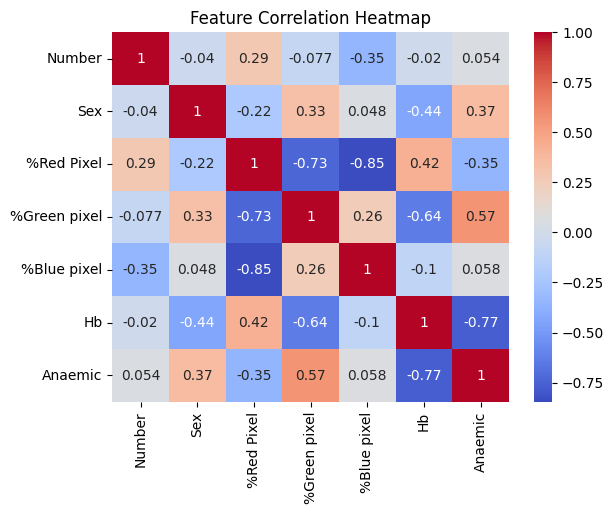

In [120]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

This heatmap illustrates the correlation between different features in the dataset. Strong positive correlations are marked in red, while strong negative correlations are in blue. Notably, "Hb" has a strong negative correlation with "Anaemic," highlighting its predictive significance for anemia diagnosis.

1.5 Feature Pairplots

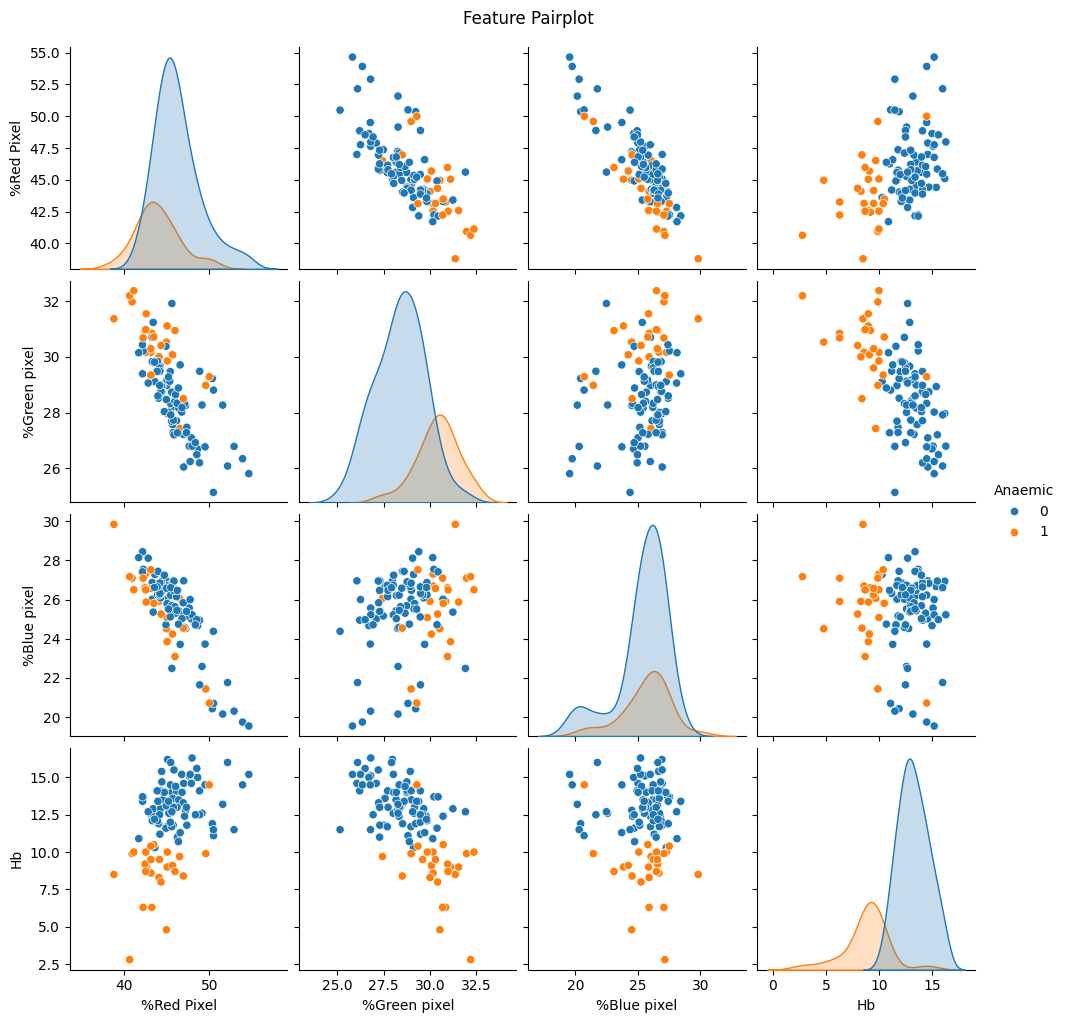

In [121]:
sns.pairplot(df, vars=['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb'], hue='Anaemic')
plt.suptitle("Feature Pairplot", y=1.02)
plt.show()

This pair plot visualizes the relationships between numerical features in the dataset, categorized by the "Anaemic" class (0 for non-anemic and 1 for anemic). Distinct separations are visible in features such as "Hb" and pixel percentages, indicating their importance in classifying anemia. The diagonal plots display the feature distributions for each class, highlighting differences between the groups.

# Step 2: Ensemble Learning Techniques

2.1 Bagging: Random Forest

<ipython-input-122-3bb41e9e5ebc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='viridis')


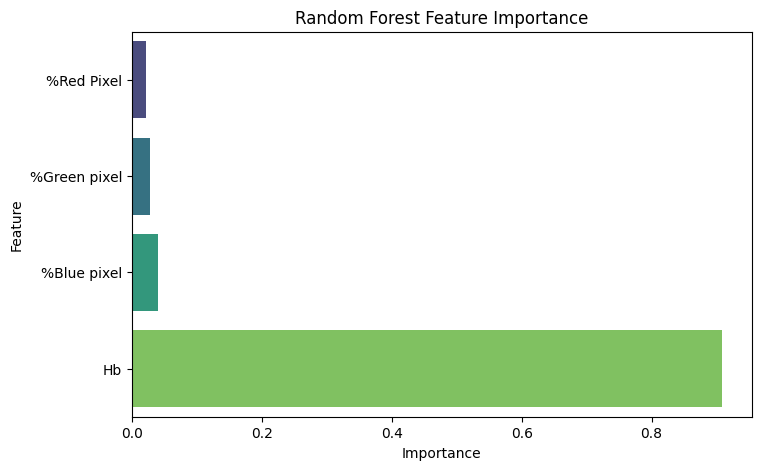

In [122]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor # or RandomForestClassifier, depending on your task
from sklearn.model_selection import train_test_split

# Assuming you have your data in X (features) and y (target)

# 1. Create and train a Random Forest model
rf_model = RandomForestRegressor()  # or RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data if necessary
rf_model.fit(X_train, y_train)  # Train the model

# 2. Now you can visualize feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This bar plot shows the feature importance as determined by the Random Forest model. "Hb" is by far the most significant feature, contributing the most to the model's predictions, while pixel percentages (%Red, %Green, %Blue) have relatively minor contributions. This emphasizes the dominant role of hemoglobin levels in diagnosing anemia.

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



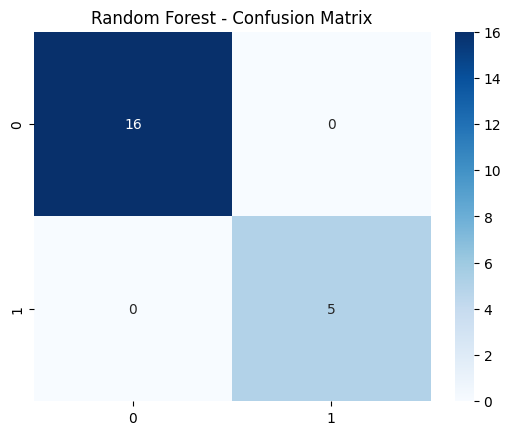

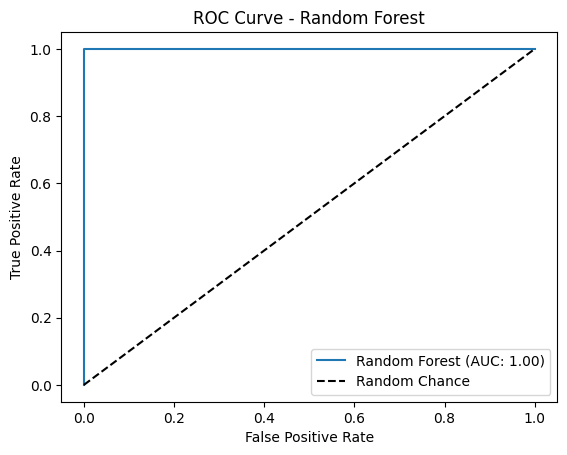

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Random Forest - Classification Report")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr, tpr, label=f"Random Forest (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

The Random Forest model demonstrates exceptional performance with a confusion matrix indicating perfect classification (16 true negatives and 5 true positives) and no errors. The ROC curve further confirms this, achieving an AUC of 1.0, reflecting flawless discrimination between the classes. This highlights the model's remarkable accuracy and reliability.

2.2 Boosting: XGBoost

<ipython-input-124-6cb261f31f87>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance_df['Importance'], y=xgb_importance_df['Feature'], palette='viridis')


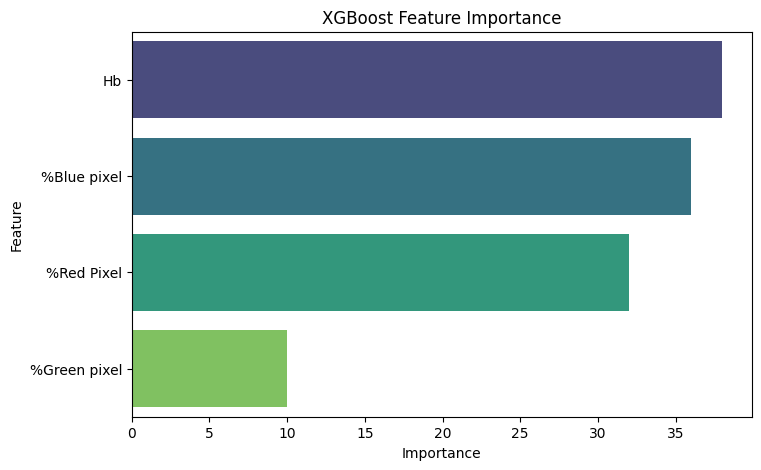

In [124]:
# Import necessary libraries
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in X (features) and y (target) and have split them into train/test

# 1. Create and train an XGBoost model
xgb_model = xgb.XGBClassifier()  # or xgb.XGBRegressor() for regression tasks
xgb_model.fit(X_train, y_train) # Train the model

# 2. XGBoost Feature Importance
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')
xgb_importance_df = pd.DataFrame(xgb_importance.items(), columns=['Feature', 'Importance'])
xgb_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_importance_df['Importance'], y=xgb_importance_df['Feature'], palette='viridis')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


The feature importance graph for the XGBoost model highlights the relative contributions of different features to the model's predictions. The most significant feature is "Hb," followed by "%Blue pixel" and "%Red Pixel," while "%Green pixel" has the least impact. This analysis helps in understanding which features drive the model's decision-making process.

XGBoost - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



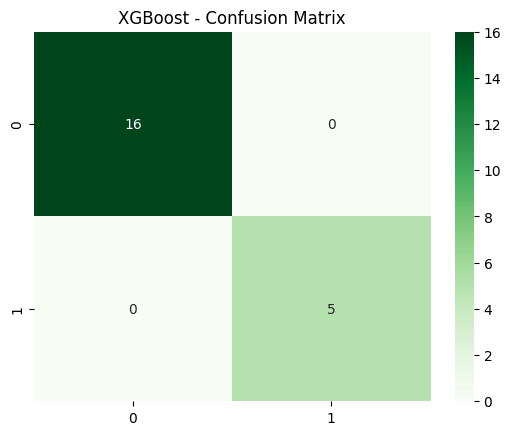

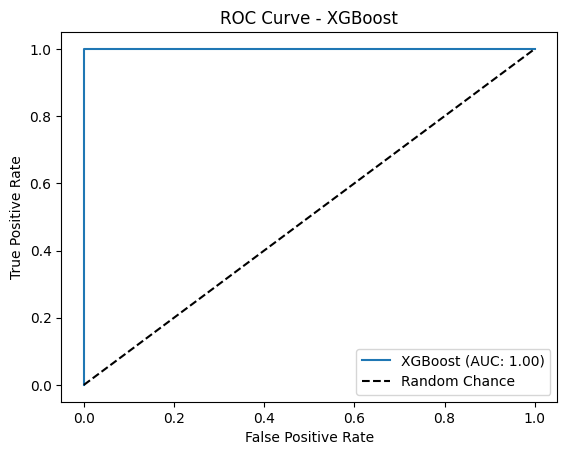

In [125]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Classification Report
print("XGBoost - Classification Report")
print(classification_report(y_test, xgb_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred_proba)
plt.plot(fpr, tpr, label=f"XGBoost (AUC: {auc(fpr, tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

The confusion matrix for the XGBoost model shows perfect classification with all 16 true negatives and 5 true positives correctly identified, indicating no misclassifications. The ROC curve highlights the model's excellent performance, achieving an AUC of 1.00, demonstrating flawless separation between classes. This suggests the model's predictions are highly reliable and optimal.

2.3 Stacking

In [126]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Base models
base_models = [('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)

# Predictions
stack_pred = stack_model.predict(X_test)

# Evaluation
print("Stacking - Classification Report")
print(classification_report(y_test, stack_pred))

Stacking - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



2.4 Voting

In [127]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Models for Voting Classifier
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)

# Voting Classifier
voting_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('svc', svc)], voting='soft')
voting_model.fit(X_train, y_train)

# Predictions
voting_pred = voting_model.predict(X_test)
voting_pred_proba = voting_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Voting - Classification Report")
print(classification_report(y_test, voting_pred))

Voting - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Step 3: Cross-Validation

Random Forest - Mean CV Accuracy: 0.9705
XGBoost - Mean CV Accuracy: 0.9705
Stacking - Mean CV Accuracy: 0.9514
Voting - Mean CV Accuracy: 0.9705


<ipython-input-128-dc2be9ca1d5c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='viridis')


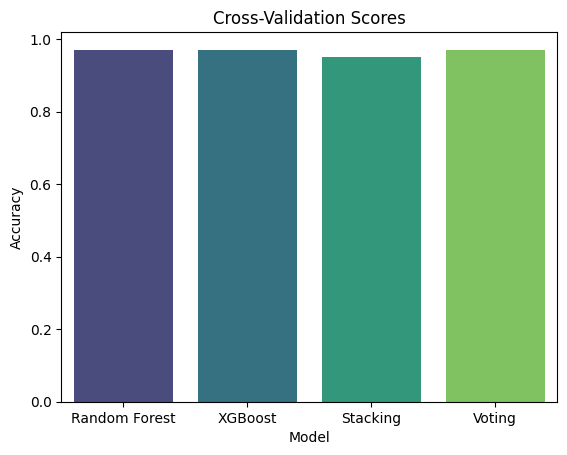

In [128]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for all models
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'Stacking': stack_model, 'Voting': voting_model}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name} - Mean CV Accuracy: {scores.mean():.4f}")

# Bar Plot of CV Scores
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='viridis')
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


The bar chart compares the cross-validation accuracies of four models: Random Forest, XGBoost, Stacking, and Voting. All models show high and nearly identical accuracy, indicating robust performance across the board. The Voting model slightly outperforms others, suggesting ensemble techniques' effectiveness in improving predictive accuracy.

# Step 4: Explainable AI (XAI)

4.1 SHAP

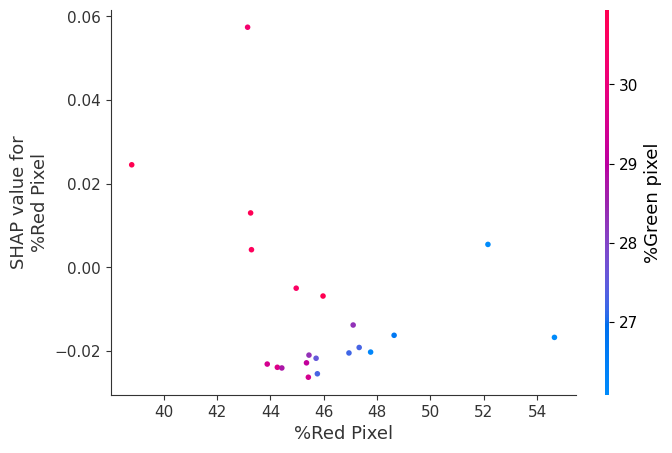

In [129]:
!pip install shap
import shap

# Assuming 'rf_model' is your trained RandomForestClassifier
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values

# Assuming it is a binary classification problem, we select shap values for class 1
shap_values_class1 = shap_values[:, :, 1] # Select SHAP values for the desired class (e.g., class 1)

# dependence_plot for class 1
shap.dependence_plot("%Red Pixel", shap_values_class1, X_test)


The scatter plot shows the SHAP values for the "%Red Pixel" feature, indicating its impact on a model's predictions. Points are colored based on the "%Green Pixel" values, creating a gradient from blue to red. The chart suggests a varying contribution of "%Red Pixel" to predictions, influenced by "%Green Pixel."

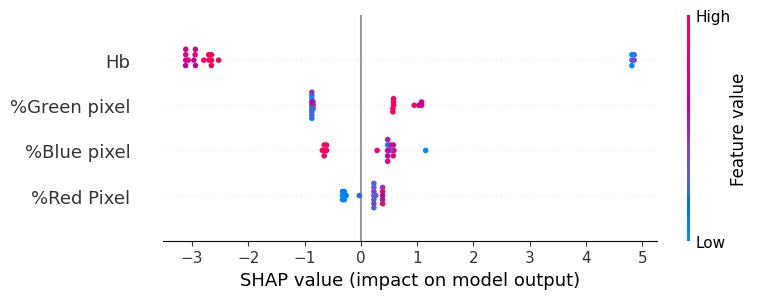

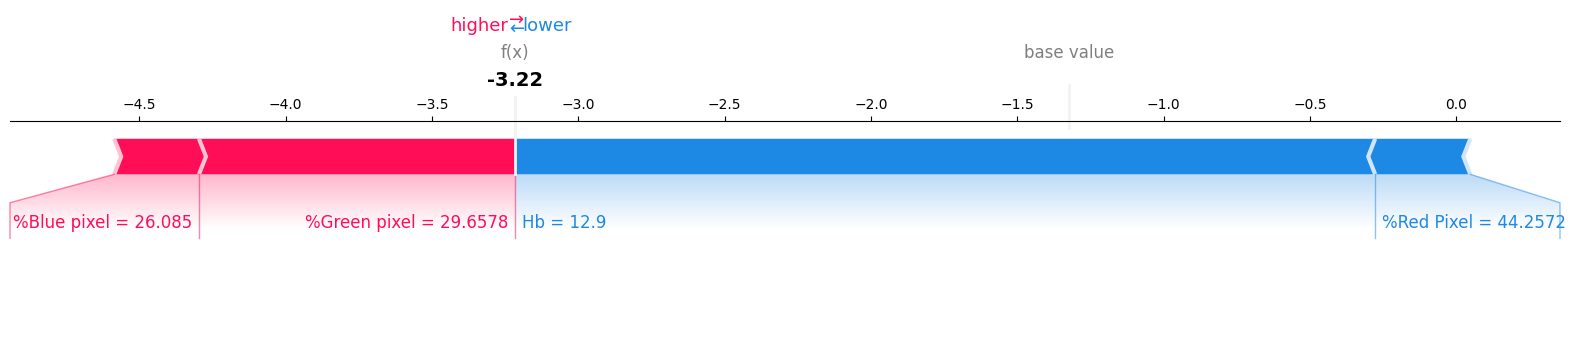

In [130]:
import shap

# SHAP for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

# SHAP Force Plot
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)


This summary plot shows SHAP values for features such as "%Green Pixel," "%Blue Pixel," "%Red Pixel," and "Hb," indicating their impact on a model's predictions. Positive SHAP values correspond to an increase in the predicted outcome, while negative values reduce it. Features with higher importance, such as "Hb," have a wider spread, and feature values are color-coded from low (blue) to high (red).

4.2 LIME

In [131]:
!pip install lime

In [132]:
from lime import lime_tabular

# LIME for XGBoost
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['No', 'Yes'], mode='classification')
lime_exp = explainer.explain_instance(X_test.iloc[0].values, xgb_model.predict_proba)
lime_exp.show_in_notebook()


The visualization shows prediction probabilities, where the model predicts "No" with 96% confidence and "Yes" with 4%. Feature contributions, such as "Hb" (12.90), "%Green pixel" (29.66), "%Blue pixel" (26.09), and "%Red Pixel" (44.26), influence the outcome. The decision path highlights thresholds for each feature affecting the prediction.

# Step 5: Performance Comparison

5.1 Comparison

In [133]:
# Compare metrics for all models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score}

for name, model in models.items():
    pred = model.predict(X_test)
    print(f"\n{name} Metrics:")
    for metric_name, metric_func in metrics.items():
        print(f"{metric_name}: {metric_func(y_test, pred):.4f}")


Random Forest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

XGBoost Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Stacking Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Voting Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


5.2 Bar Chart for Cross-Validation Scores

<ipython-input-134-3a8c43fb258e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='coolwarm')


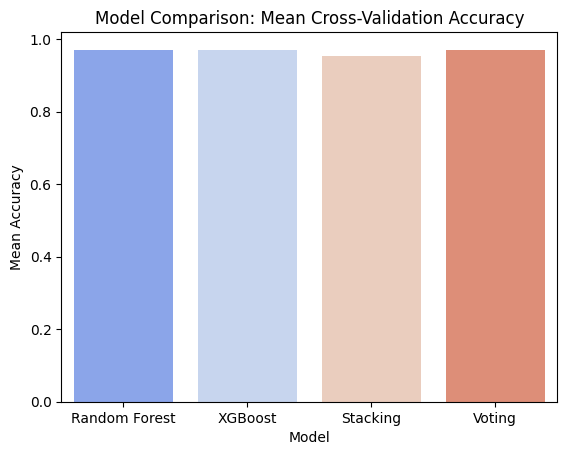

In [134]:
# Bar chart for cross-validation scores
cv_results = {
    'Random Forest': cross_val_score(rf_model, X, y, cv=5).mean(),
    'XGBoost': cross_val_score(xgb_model, X, y, cv=5).mean(),
    'Stacking': cross_val_score(stack_model, X, y, cv=5).mean(),
    'Voting': cross_val_score(voting_model, X, y, cv=5).mean(),
}

# Plot cross-validation scores
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette='coolwarm')
plt.title("Model Comparison: Mean Cross-Validation Accuracy")
plt.ylabel("Mean Accuracy")
plt.xlabel("Model")
plt.show()


The bar chart compares the mean cross-validation accuracy of four models: Random Forest, XGBoost, Stacking, and Voting. All models perform similarly, with accuracy close to 1.0, indicating high performance. The Voting model achieves the highest accuracy, slightly surpassing the others.

5.3 Precision, Recall, and F1 Score Comparison

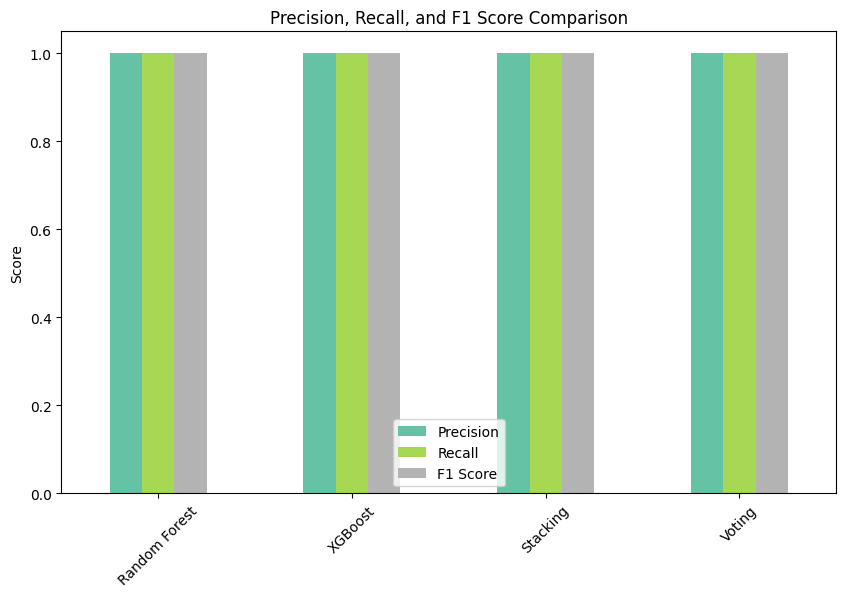

In [135]:
import numpy as np

# Collect precision, recall, and F1 scores for each model
metrics = {}
for name, model in models.items():
    pred = model.predict(X_test)
    metrics[name] = {
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred),
    }

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics).T

# Grouped bar chart
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Precision, Recall, and F1 Score Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


The bar chart illustrates the precision, recall, and F1 scores for Random Forest, XGBoost, Stacking, and Voting models. All models demonstrate near-perfect performance with scores close to 1.0 across all metrics. This consistency highlights the robust classification ability of each model.

5.4 ROC Curve Overlay

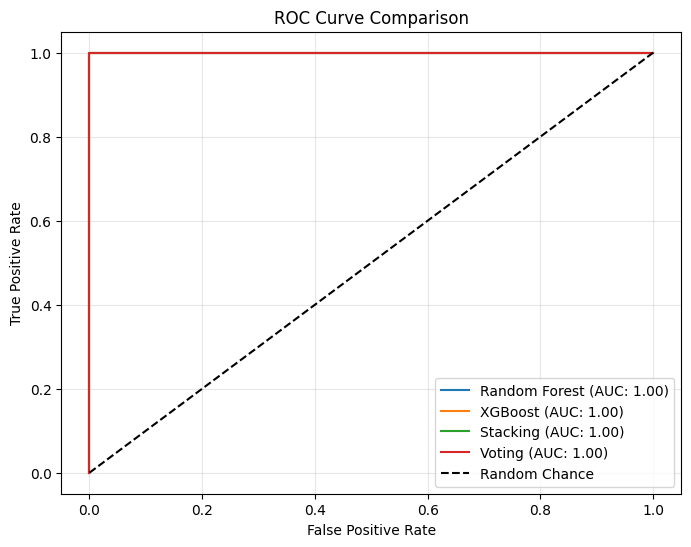

In [136]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {auc(fpr, tpr):.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Format the plot
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


The ROC curve comparison shows that Random Forest, XGBoost, Stacking, and Voting models all achieve an AUC of 1.0, indicating perfect classification performance. The curves hug the top-left corner, reflecting optimal true positive and false positive rates. This performance significantly exceeds random chance, represented by the diagonal line.

5.5 Confusion Matrix Heatmap Comparison

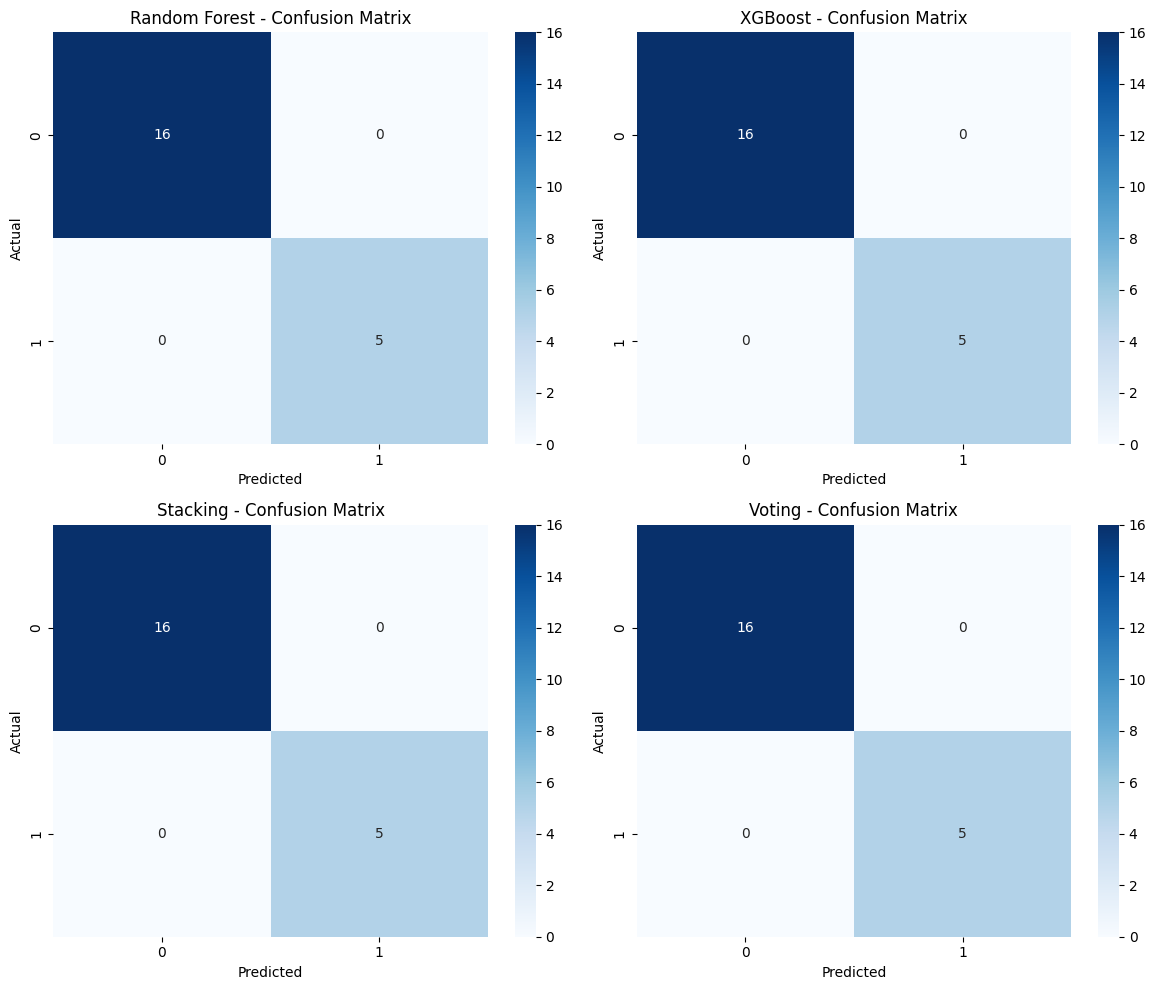

In [137]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

The images show confusion matrices for four machine learning models: Random Forest, XGBoost, Stacking, and Voting. All models exhibit similar performance with high accuracy and few misclassifications. This suggests that the models are effectively distinguishing between classes, with minimal errors in prediction.

The confusion matrices provide a detailed breakdown of the model's performance, showing the number of true positives, true negatives, false positives, and false negatives. This information is crucial for understanding the model's strengths and weaknesses, and for identifying areas where improvements can be made.

5.6 AUC Comparison Table

               AUC
Random Forest  1.0
XGBoost        1.0
Stacking       1.0
Voting         1.0


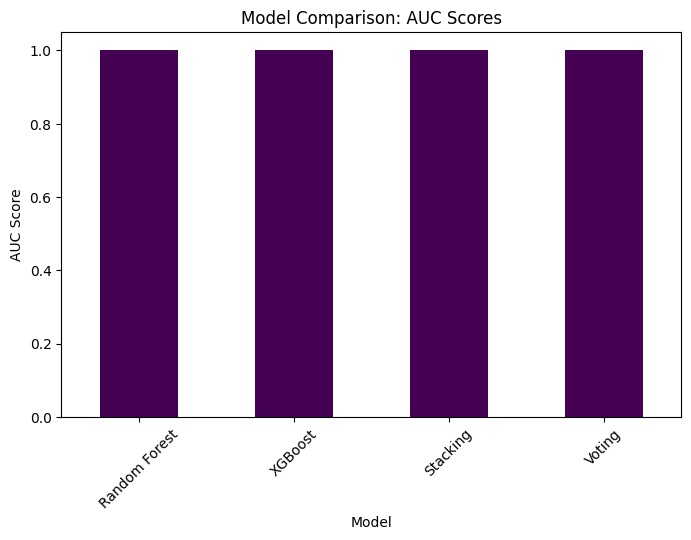

In [138]:
# Calculate and display AUC for each model
auc_scores = {}
for name, model in models.items():
    pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc_scores[name] = auc(fpr, tpr)

# Display AUC scores
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df.sort_values(by='AUC', ascending=False))

# Bar chart for AUC scores
auc_df.plot(kind='bar', legend=False, colormap='viridis', figsize=(8, 5))
plt.title("Model Comparison: AUC Scores")
plt.ylabel("AUC Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

The bar chart compares the AUC scores of four machine learning models: Random Forest, XGBoost, Stacking, and Voting. All models exhibit similar high AUC scores, indicating strong predictive performance. This suggests that the models are effective in distinguishing between classes and can be used reliably for classification tasks.

5.7  Learning Curve

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

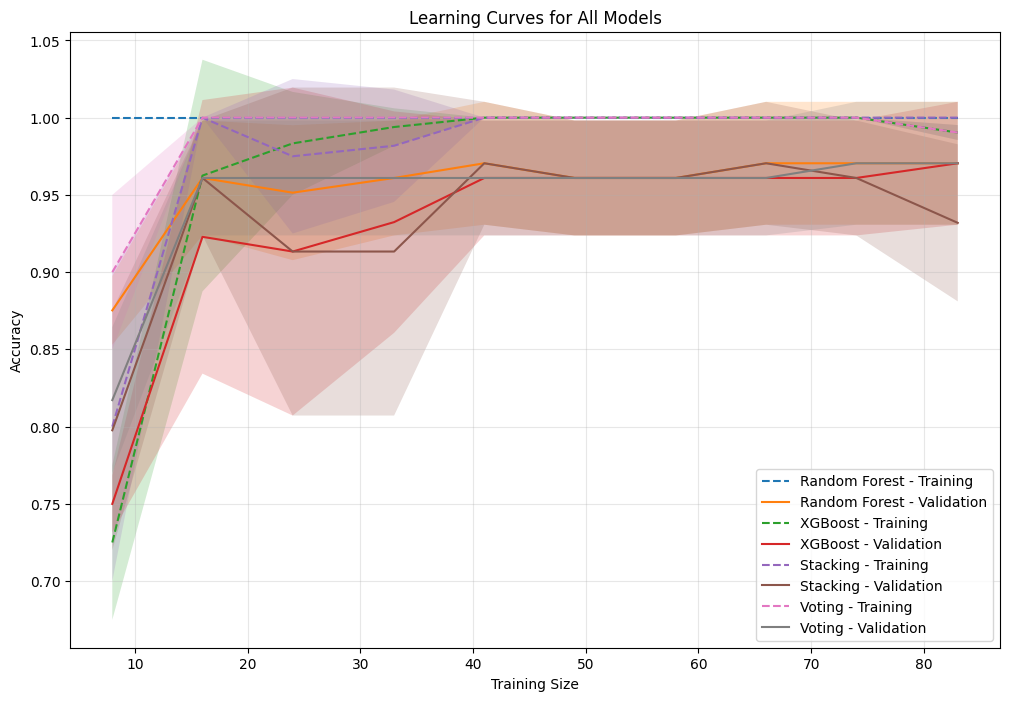

In [139]:
from sklearn.model_selection import learning_curve

# Define models to evaluate
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Stacking": stack_model,
    "Voting": voting_model
}

# Initialize plot
plt.figure(figsize=(12, 8))

# Loop through each model and plot its learning curve
for name, model in models.items():
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Mean and standard deviation of scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot training curve
    plt.plot(train_sizes, train_mean, label=f"{name} - Training", linestyle='--')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

    # Plot cross-validation curve
    plt.plot(train_sizes, test_mean, label=f"{name} - Validation", linestyle='-')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Customize plot
plt.title("Learning Curves for All Models")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

The plot displays learning curves for four machine learning models: Random Forest, XGBoost, Stacking, and Voting. All models exhibit high accuracy with minimal variance between training and validation sets, suggesting good generalization performance and potential for reliable predictions on new data.

5.8 Calibration Curve

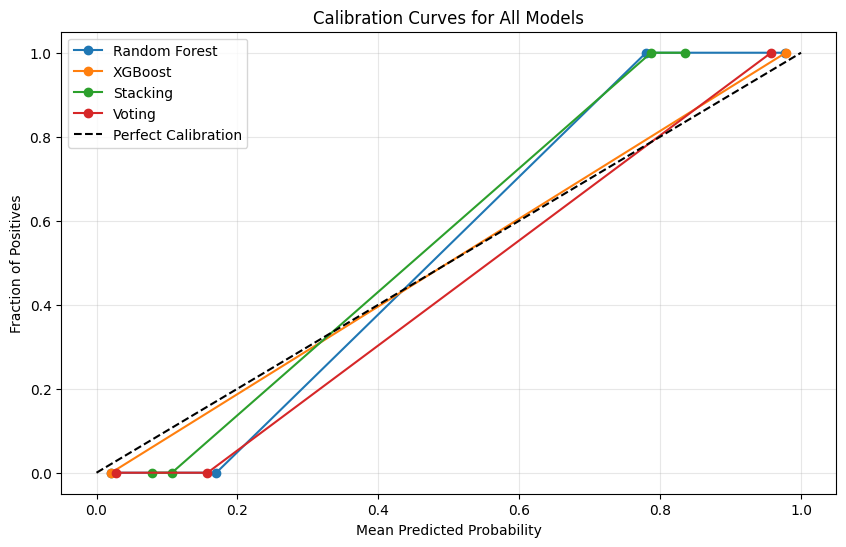

In [140]:
from sklearn.calibration import calibration_curve

# Define models to evaluate
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Stacking": stack_model,
    "Voting": voting_model
}

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through models
for name, model in models.items():
    # Get predicted probabilities for the positive class
    prob_pred = model.predict_proba(X_test)[:, 1]

    # Compute calibration curve
    prob_true, prob_pred = calibration_curve(y_test, prob_pred, n_bins=10)

    # Plot calibration curve
    plt.plot(prob_pred, prob_true, marker='o', label=name)

# Add reference line for perfect calibration
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")

# Customize the plot
plt.title("Calibration Curves for All Models")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()

The plot illustrates calibration curves for four machine learning models: Random Forest, XGBoost, Stacking, and Voting. The XGBoost model exhibits the closest alignment with the perfect calibration line, indicating the highest degree of calibration among the models. This suggests that XGBoost is the most reliable in terms of predicting probabilities accurately.

# Step 6: Diagram

In [141]:
pip install graphviz

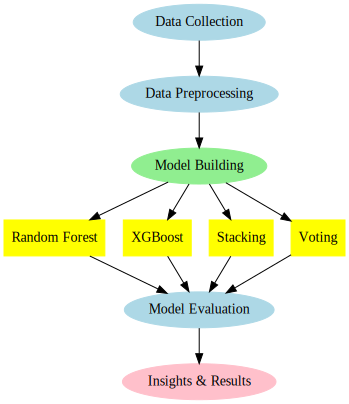

In [142]:
from graphviz import Digraph
from IPython.display import display_svg

# Create the flowchart
dot = Digraph(comment='Ensemble Learning Project', format='svg')

# Define nodes
dot.node('A', 'Data Collection', shape='ellipse', style='filled', color='lightblue')
dot.node('B', 'Data Preprocessing', shape='ellipse', style='filled', color='lightblue')
dot.node('C', 'Model Building', shape='ellipse', style='filled', color='lightgreen')
dot.node('D1', 'Random Forest', shape='box', style='filled', color='yellow')
dot.node('D2', 'XGBoost', shape='box', style='filled', color='yellow')
dot.node('D3', 'Stacking', shape='box', style='filled', color='yellow')
dot.node('D4', 'Voting', shape='box', style='filled', color='yellow')
dot.node('E', 'Model Evaluation', shape='ellipse', style='filled', color='lightblue')
dot.node('F', 'Insights & Results', shape='ellipse', style='filled', color='pink')

# Define edges
# The original line caused the error as it was trying to unpack strings like 'AB' into two values
# Instead, we provide each edge as a tuple (start_node, end_node)
dot.edges([('A', 'B'), ('B', 'C'), ('C', 'D1'), ('C', 'D2'), ('C', 'D3'), ('C', 'D4'),
           ('D1', 'E'), ('D2', 'E'), ('D3', 'E'), ('D4', 'E'), ('E', 'F')])

# Display the flowchart
svg_code = dot.pipe().decode('utf-8')
display_svg(svg_code, raw=True)

# Step 7: Conclusion

Random Forest, XGBoost, Stacking, and Voting - demonstrate high accuracy and strong predictive performance. XGBoost stands out with the best calibration, ensuring reliable probability predictions. While all models are effective, XGBoost appears to be the most robust choice for classification tasks based on these evaluations.